<a href="https://colab.research.google.com/github/pa-gaspar/discog-data-black-metal/blob/main/Discogs_Data_Analysis_Black_Metal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data Insights From Discogs Database -  Black Metal


---







## Introduction


### What is Discogs



> Discogs is a database of information about audio recordings, including commercial releases, promotional releases, and bootleg or off-label releases. Database contents are user-generated, and described in The New York Times as "Wikipedia-like".While the site was originally created with the goal of becoming the largest online database of electronic music, it now includes releases in all genres and on all formats.



https://en.wikipedia.org/wiki/Discogs


### Black Metal



> Black metal is an extreme subgenre of heavy metal music. Common traits include fast tempos, a shrieking vocal style, heavily distorted guitars played with tremolo picking, raw (lo-fi) recording, unconventional song structures, and an emphasis on atmosphere. Artists often appear in corpse paint and adopt pseudonyms.

https://en.wikipedia.org/wiki/Black_metal


# 1- Getting a look on the dataset and selecting the proper data.


## Importing and reading


### Importing the essential libraries for EDA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd


!pip install pycountry
import pycountry


from google.colab import drive

drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.5 MB/s eta 0:00:00
Mounted at /content/drive


### Creating the dataframe

In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Estudos/Data Science/dataset/release_data_styles.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31257071 entries, 0 to 31257070
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   release_id  int64  
 1   country     object 
 2   year        float64
 3   genre       object 
 4   style       object 
 5   format      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


## Initial and simple data analysis

### Describe and info

In [ ]:
print(df.describe())
print('\n')
print(df.info())

         release_id          year
count  3.125707e+07  2.791645e+07
mean   7.633258e+06  1.997161e+03
std    4.602774e+06  1.694347e+01
min    1.000000e+00  1.860000e+03
25%    3.496742e+06  1.986000e+03
50%    7.465283e+06  2.001000e+03
75%    1.170464e+07  2.011000e+03
max    1.573176e+07  2.021000e+03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31257071 entries, 0 to 31257070
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   release_id  int64  
 1   country     object 
 2   year        float64
 3   genre       object 
 4   style       object 
 5   format      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB
None


The first 5 examples from the dataset

In [ ]:
df.head()

,release_id,country,year,genre,style,format
0,1,Sweden,1999.0,Electronic,Deep House,Vinyl
1,2,Sweden,1998.0,Electronic,Broken Beat,Vinyl
2,2,Sweden,1998.0,Electronic,Techno,Vinyl
3,2,Sweden,1998.0,Electronic,Tech House,Vinyl
4,3,US,1999.0,Electronic,Techno,CD


### Unique Values

In [ ]:
df.nunique()


release_id    12867980
country            281
year               132
genre               15
style              565
format              57
dtype: int64

There are 12.867.980 unique release_id and 31.257.071 rows on the dataset. It's weird, so let's take a look on the mode of release_id

In [ ]:
df[df['release_id'] == df['release_id'].value_counts().index[0]].head()

,release_id,country,year,genre,style,format
6134083,2779966,Ukraine,2011.0,Electronic,Spoken Word,File
6134084,2779966,Ukraine,2011.0,Electronic,Dub,File
6134085,2779966,Ukraine,2011.0,Electronic,Poetry,File
6134086,2779966,Ukraine,2011.0,Electronic,IDM,File
6134087,2779966,Ukraine,2011.0,Electronic,Electro,File


In [ ]:
df[df['release_id'] == df['release_id'].value_counts().index[1]].head()

,release_id,country,year,genre,style,format
30049348,15112786,Germany,2020.0,Electronic,Sound Collage,File
30049349,15112786,Germany,2020.0,Electronic,Experimental,File
30049350,15112786,Germany,2020.0,Electronic,Thug Rap,File
30049351,15112786,Germany,2020.0,Electronic,Gangsta,File
30049352,15112786,Germany,2020.0,Electronic,Cloud Rap,File


In [ ]:
df[df['release_id'] == 3238].head()

,release_id,country,year,genre,style,format
6466,3238,US,1994.0,Electronic,Alternative Rock,CD
6467,3238,US,1994.0,Electronic,Industrial Metal,CD
6468,3238,US,1994.0,Rock,Alternative Rock,CD
6469,3238,US,1994.0,Rock,Industrial Metal,CD
6470,3238,US,1994.0,Pop,Alternative Rock,CD


We can see that there are different values for style in a same release_id. Maybe there can be different values for style and format too.

### Null Values

In [ ]:
df.isna().sum()

release_id          0
country        787051
year          3340623
genre               6
style         2719939
format              3
dtype: int64

## Selecting Black Metal Data

### Creating a dataframe just for black metal

#### Filtering

Filtering the styles with "metal" in the name. So we can see better which ones can fit on the "black metal scene"

**why didn't we directly filter the styles with "black metal" in the name?**

Because sometimes the style can be labeled as "blackened death metal", which can be included in the black metal scene.



In [ ]:
df2 = df[df['style'].str.contains("metal", case=False, na=False)]
print(df2["style"].unique())
print(df2.head())



['Industrial Metal' 'Heavy Metal' 'Death Metal' 'Nu Metal' 'Funk Metal'
 'Black Metal' 'Doom Metal' 'Progressive Metal' 'Gothic Metal'
 'Speed Metal' 'Groove Metal' 'Viking Metal' 'Sludge Metal' 'Folk Metal'
 'Depressive Black Metal' 'Post-Metal' 'Funeral Doom Metal'
 'Melodic Death Metal' 'Power Metal' 'Atmospheric Black Metal' 'Metalcore'
 'Technical Death Metal']
       release_id country    year       genre             style format
6467         3238      US  1994.0  Electronic  Industrial Metal     CD
6469         3238      US  1994.0        Rock  Industrial Metal     CD
6471         3238      US  1994.0         Pop  Industrial Metal     CD
23535       11973  Europe  1995.0  Electronic       Heavy Metal     CD
23540       11973  Europe  1995.0        Rock       Heavy Metal     CD


Filtering the metal styles than contain black in the name

In [ ]:
df2 = df2[df2['style'].str.contains("black", case=False, na=False)]
print(df2["style"].unique())
print(df2.head())

['Black Metal' 'Depressive Black Metal' 'Atmospheric Black Metal']
        release_id  country    year       genre        style format
134548       65919  Austria  2000.0  Electronic  Black Metal  Vinyl
134552       65919  Austria  2000.0        Rock  Black Metal  Vinyl
141781       69242  Germany  2001.0  Electronic  Black Metal  Vinyl
141783       69242  Germany  2001.0        Rock  Black Metal  Vinyl
200452       97407   Sweden  1996.0  Electronic  Black Metal     CD


#### Info about df2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164443 entries, 134548 to 31256931
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   release_id  164443 non-null  int64  
 1   country     157592 non-null  object 
 2   year        158313 non-null  float64
 3   genre       164443 non-null  object 
 4   style       164443 non-null  object 
 5   format      164443 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ MB


#### Number of unique values

In [ ]:
df2.nunique()

release_id    143429
country          144
year              41
genre             15
style              3
format            25
dtype: int64

#### Null Values of df2

In [ ]:
df2.isna().sum()



release_id       0
country       6851
year          6130
genre            0
style            0
format           0
dtype: int64

### Getting all the release_id data involved

 Getting all the release_id data involved with Black Metal. There are release_id data that repeat in several rows. We want to get all the data from all the release_ids present on our dataframe df2

In [ ]:
df3 = df[df['release_id'].isin(df2['release_id'].unique())]
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333440 entries, 134546 to 31256931
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   release_id  333440 non-null  int64  
 1   country     316309 non-null  object 
 2   year        320912 non-null  float64
 3   genre       333440 non-null  object 
 4   style       333440 non-null  object 
 5   format      333440 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 17.8+ MB


In [ ]:
df3.nunique()

release_id    143429
country          144
year              41
genre             15
style            355
format            25
dtype: int64

### Saving the data we will use (without processing)

In [ ]:
df3.to_csv('/content/drive/My Drive/Estudos/Data Science/dataset/black_metal_data.csv',index=False)

# 2 - Overall plots

## Reading the selected dataframe from the file

Reading the selected dataframe from the file we created earlier, to avoid executing all again

In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/Estudos/Data Science/dataset/black_metal_data.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333440 entries, 0 to 333439
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   release_id  333440 non-null  int64  
 1   country     316309 non-null  object 
 2   year        320912 non-null  float64
 3   genre       333440 non-null  object 
 4   style       333440 non-null  object 
 5   format      333440 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.3+ MB


## Cleaning the dataframe

Cleaning the dataframe and creating one new :
- without repeated 'release_id'
- just with Black Metal Styles in 'style'.

In [ ]:
bm_genres = ['Black Metal','Atmospheric Black Metal','Depressive Black Metal']

#df3['style'].unique()
df4 = df3[df3['style'].isin(bm_genres)]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164443 entries, 2 to 333439
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   release_id  164443 non-null  int64  
 1   country     157592 non-null  object 
 2   year        158313 non-null  float64
 3   genre       164443 non-null  object 
 4   style       164443 non-null  object 
 5   format      164443 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ MB


In [ ]:
df4['style'].unique()

array(['Black Metal', 'Depressive Black Metal', 'Atmospheric Black Metal'],
      dtype=object)

In [ ]:
df4.nunique()

release_id    143429
country          144
year              41
genre             15
style              3
format            25
dtype: int64

In [ ]:
df4 = df4.drop_duplicates(subset = 'release_id')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143429 entries, 2 to 333439
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   release_id  143429 non-null  int64  
 1   country     137580 non-null  object 
 2   year        137875 non-null  float64
 3   genre       143429 non-null  object 
 4   style       143429 non-null  object 
 5   format      143429 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.7+ MB


## Plotting year and country charts

### Year Chart

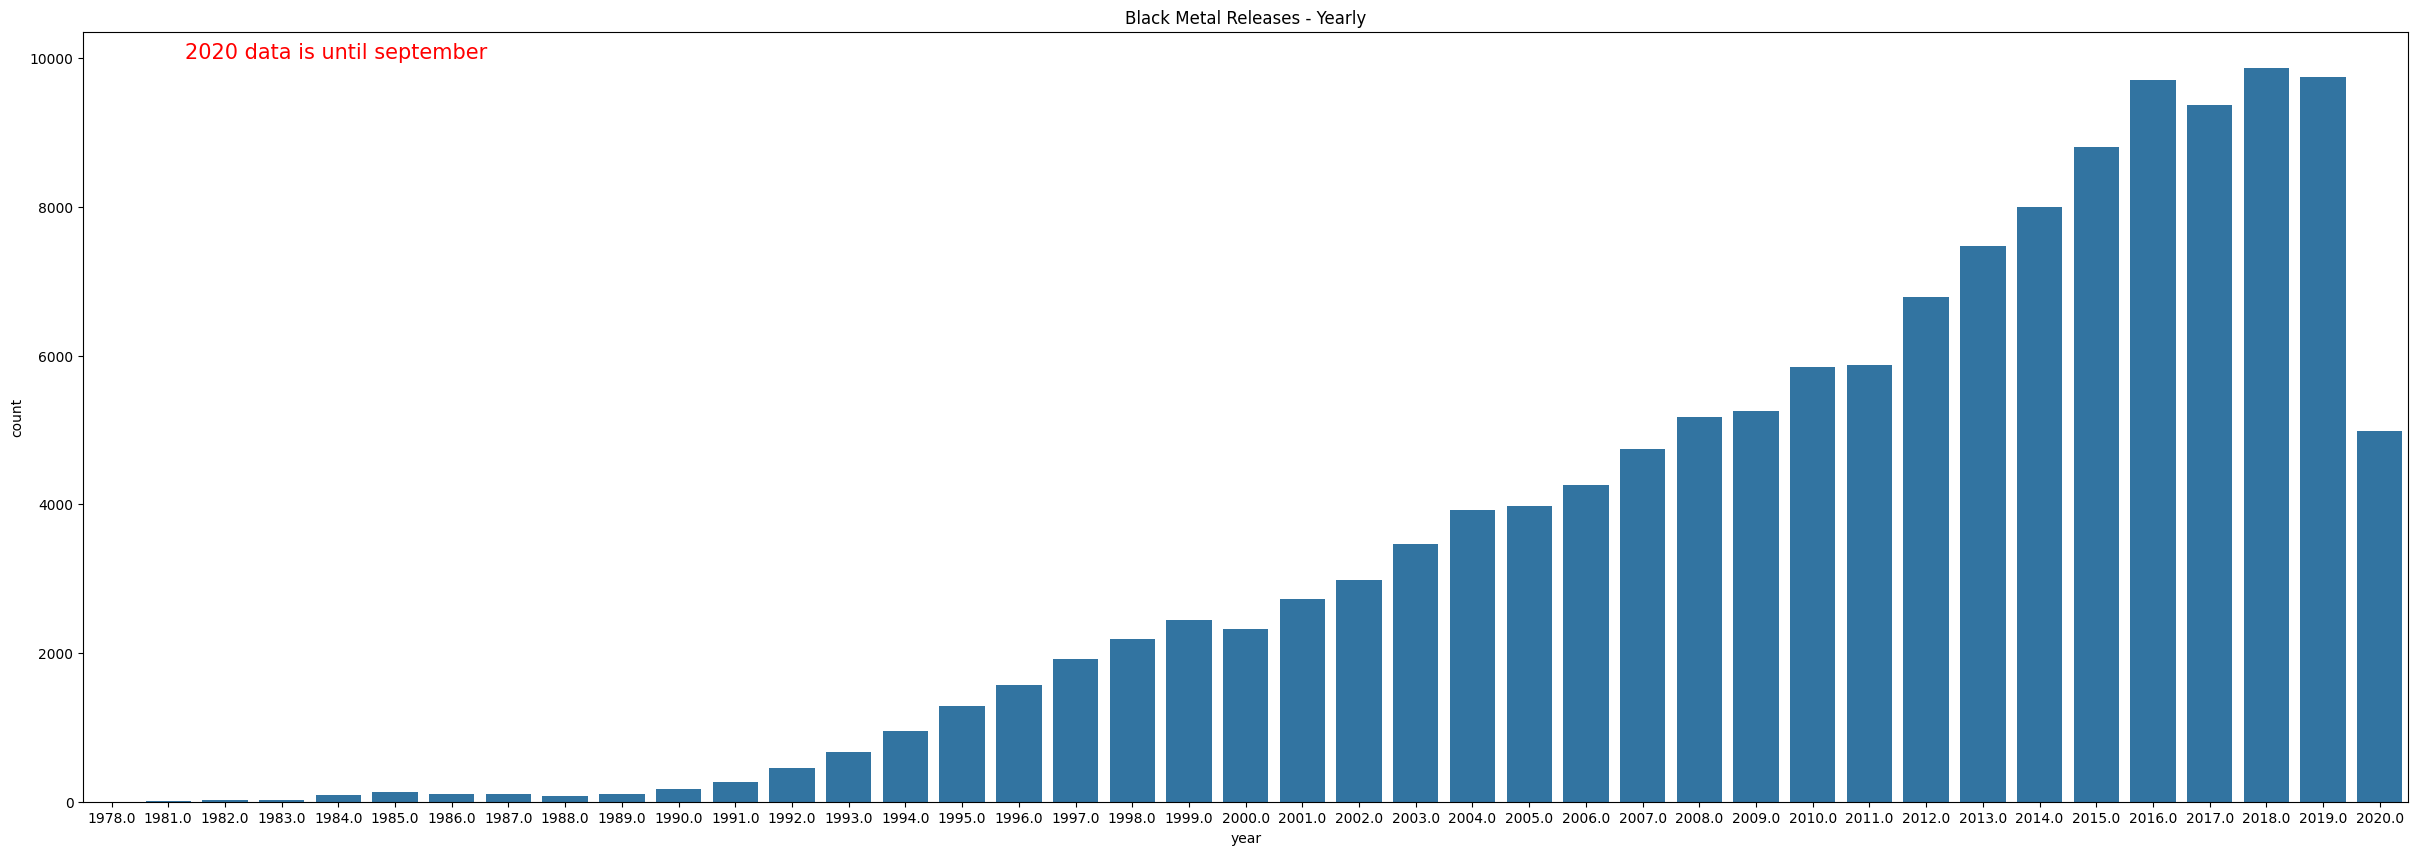

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=df4.dropna(subset=['year']),x='year')
plt.title('Black Metal Releases - Yearly')
plt.text(1.3,10000,'2020 data is until september', fontsize=15, color='red')
plt.show()

### Geographical Mapping

#### Creating a dataframe with contry frequency

In [ ]:
df4['country'].value_counts().dropna()

country
US            22472
Germany       20227
France         9700
Russia         8308
Poland         6421
              ...  
Guyana            1
Aruba             1
Reunion           1
Eritrea           1
Kyrgyzstan        1
Name: count, Length: 144, dtype: int64

#### Adjusting contries names to fit on Geopandas

In [ ]:

countries_df4 = df4['country'].value_counts().dropna().reset_index()
countries_df4.columns=['country','value']

def get_country_name(name):
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name

countries_df4['country_standard'] = countries_df4['country'].apply(get_country_name)





In [ ]:
countries_df4.head(10)

,country,value,country_standard
0,US,22472,United States
1,Germany,20227,Germany
2,France,9700,France
3,Russia,8308,Russia
4,Poland,6421,Poland
5,Italy,5712,Italy
6,UK,5422,UK
7,Sweden,4123,Sweden
8,Netherlands,3702,Netherlands
9,Finland,3666,Finland


Adjusting manually

In [ ]:

# We have to adjust manually some country_standards on the top 10 to appear on geopandas
countries_df4.loc[countries_df4['country_standard'] == 'United States', 'country_standard'] = 'United States of America'
countries_df4.loc[countries_df4['country_standard'] == 'UK', 'country_standard'] = 'United Kingdom'

countries_df4.head(10)


,country,value,country_standard
0,US,22472,United States of America
1,Germany,20227,Germany
2,France,9700,France
3,Russia,8308,Russia
4,Poland,6421,Poland
5,Italy,5712,Italy
6,UK,5422,United Kingdom
7,Sweden,4123,Sweden
8,Netherlands,3702,Netherlands
9,Finland,3666,Finland


#### Plotting the geographical map

<ipython-input-15-a4ae577c00d8>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


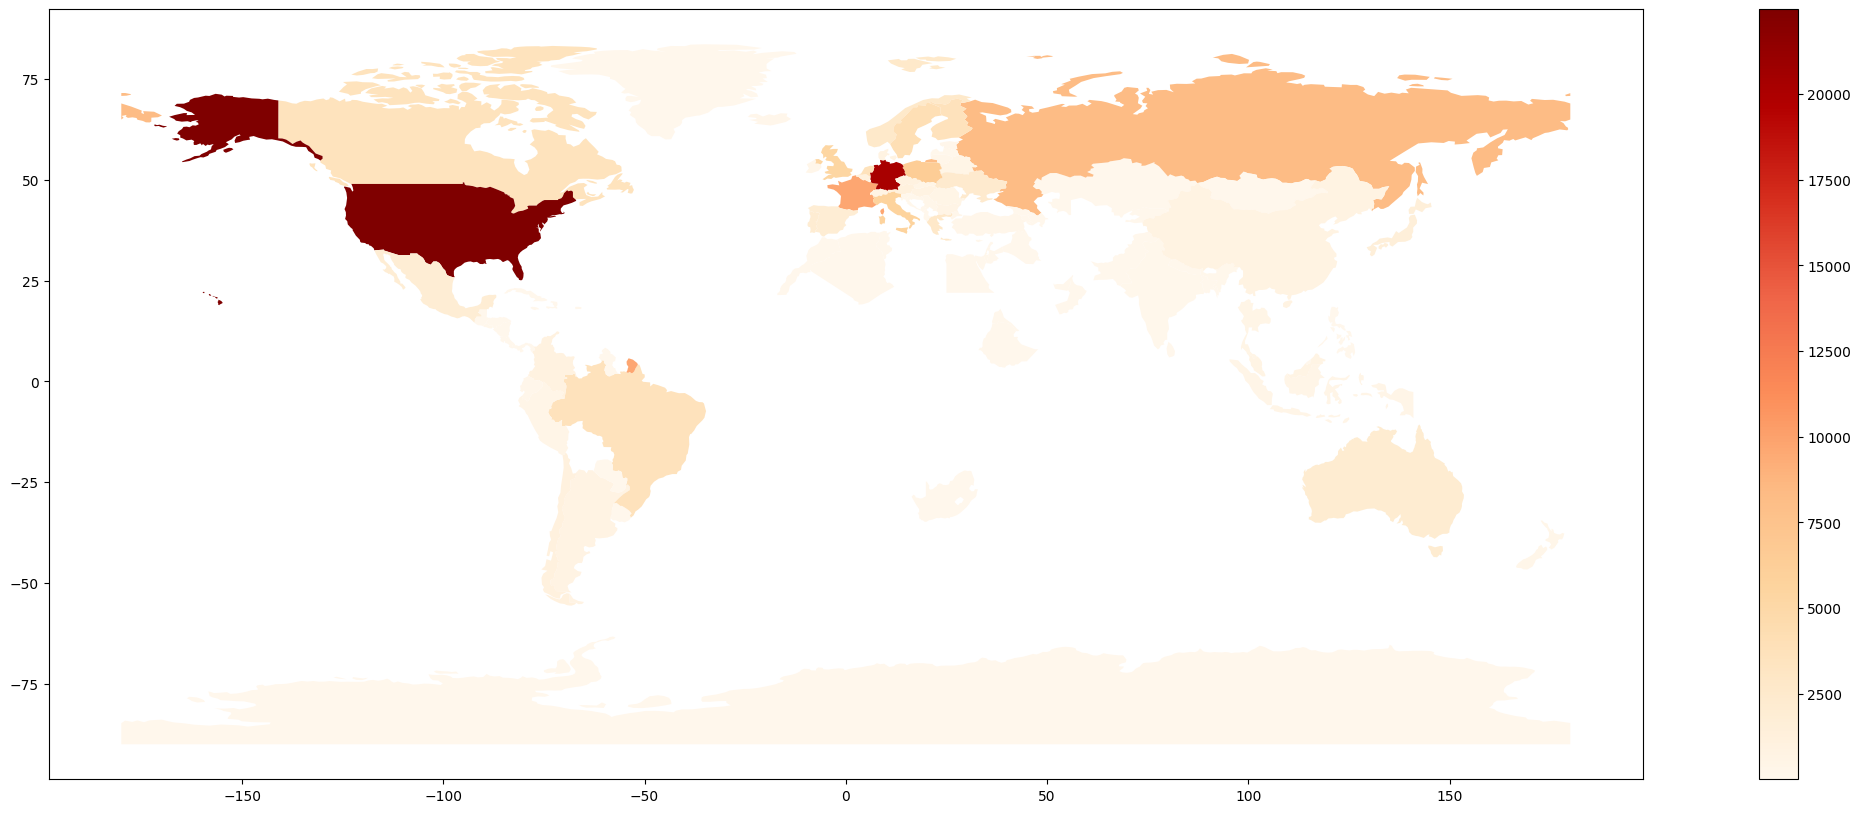

In [ ]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(countries_df4, left_on='name', right_on='country_standard')
world.plot(column='value', legend=True, cmap='OrRd',figsize=(30, 10))
plt.show()

# 3 - First Wave and Second Wave

- **Fist Wave Of Black Metal**: Before 1990;
- **Second Wave Of Black Metal:** Between 1990 and 1999.

Despite of these 2 periods have a small releasing quantity, comparing to the post 2000 period; both are of great importance because almost all black metal classic were released in one of these periods.

## First Wave Of Black Metal (All BM releasings before 1990)

Let's Select just the releasing data before 1990.

In [ ]:
df5_first_wave = df4[df4['year']<1990]
df5_first_wave.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 195 to 332702
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   release_id  668 non-null    int64  
 1   country     663 non-null    object 
 2   year        668 non-null    float64
 3   genre       668 non-null    object 
 4   style       668 non-null    object 
 5   format      668 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 36.5+ KB


### Year chart

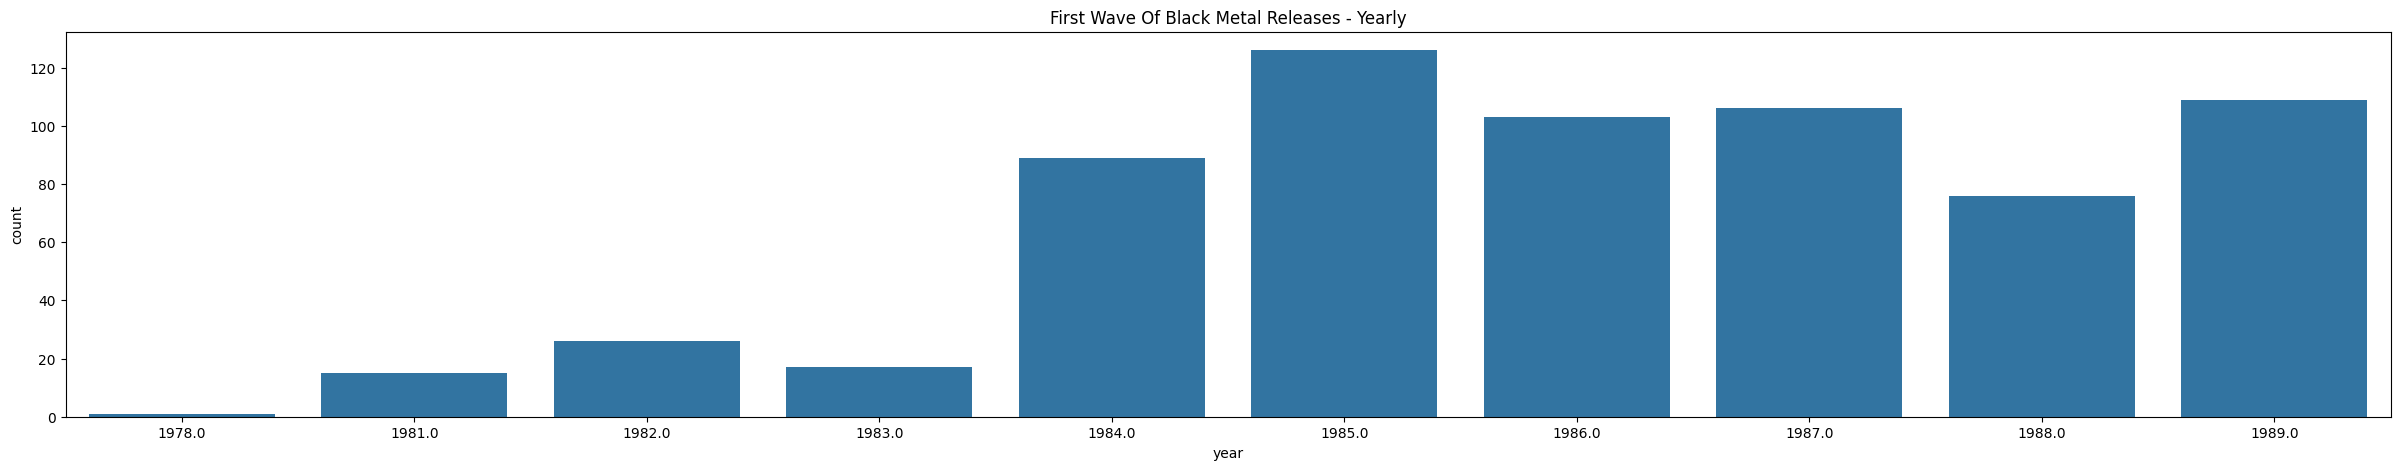

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data=df5_first_wave.dropna(subset=['year']),x='year')
plt.title('First Wave Of Black Metal Releases - Yearly')
plt.show()

### Country Chart

#### Preparing the data for geomap

Using the 'get_country_name' function created before

In [ ]:

countries_df5 = df5_first_wave['country'].value_counts().dropna().reset_index()
countries_df5.columns=['country','value']


countries_df5['country_standard'] = countries_df5['country'].apply(get_country_name)

countries_df5.loc[countries_df5['country_standard'] == 'United States', 'country_standard'] = 'United States of America'
countries_df5.loc[countries_df5['country_standard'] == 'UK', 'country_standard'] = 'United Kingdom'

countries_df5.head(10)


,country,value,country_standard
0,UK,136,United Kingdom
1,US,112,United States of America
2,Germany,59,Germany
3,Brazil,53,Brazil
4,Canada,38,Canada
5,Italy,27,Italy
6,Sweden,26,Sweden
7,France,25,France
8,Japan,22,Japan
9,Netherlands,18,Netherlands


#### Plotting the country chart

<ipython-input-32-df37186fb0ab>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_first_wave = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


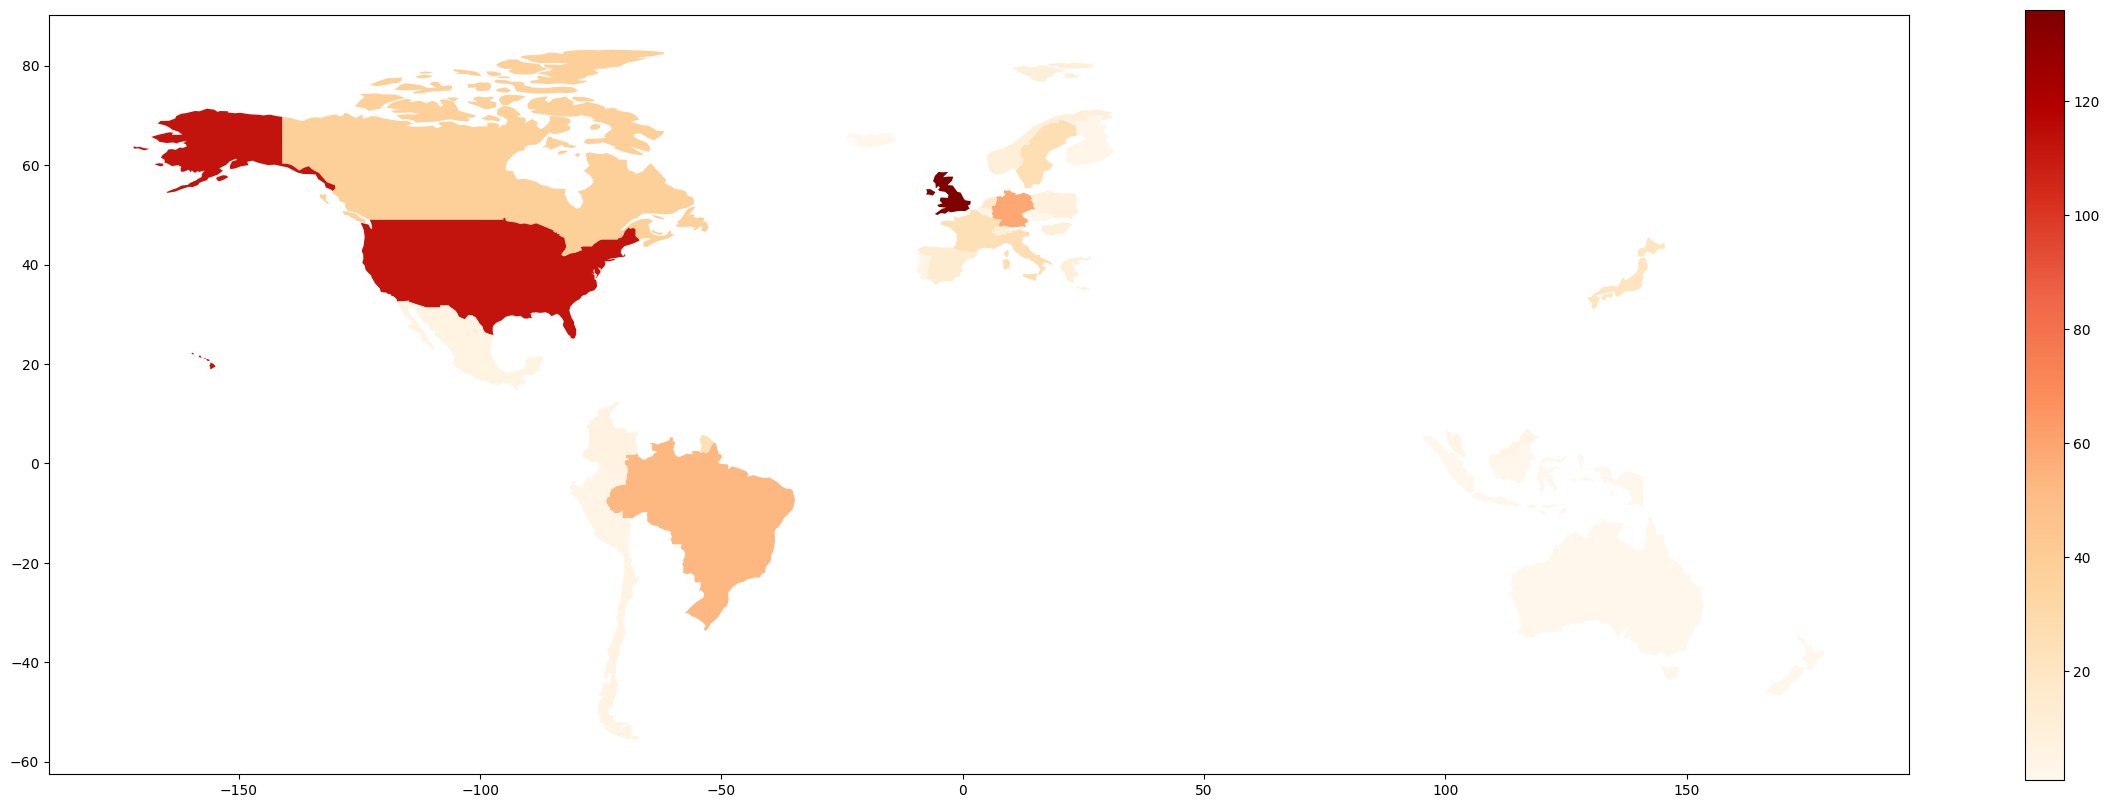

In [ ]:
world_first_wave = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_first_wave = world_first_wave.merge(countries_df5, left_on='name', right_on='country_standard')
world_first_wave.plot(column='value', legend=True, cmap='OrRd',figsize=(30, 10))
plt.show()

## Second Wave Of Black Metal (All BM releasings between 1990 and 1999)

Let's Select just the releasing data between 1990 and 1999.

In [ ]:
df6_second_wave = df4[(df4['year']>=1990) & (df4['year']<2000)]
df6_second_wave.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11917 entries, 15 to 333293
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   release_id  11917 non-null  int64  
 1   country     11715 non-null  object 
 2   year        11917 non-null  float64
 3   genre       11917 non-null  object 
 4   style       11917 non-null  object 
 5   format      11917 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 651.7+ KB


### Year chart

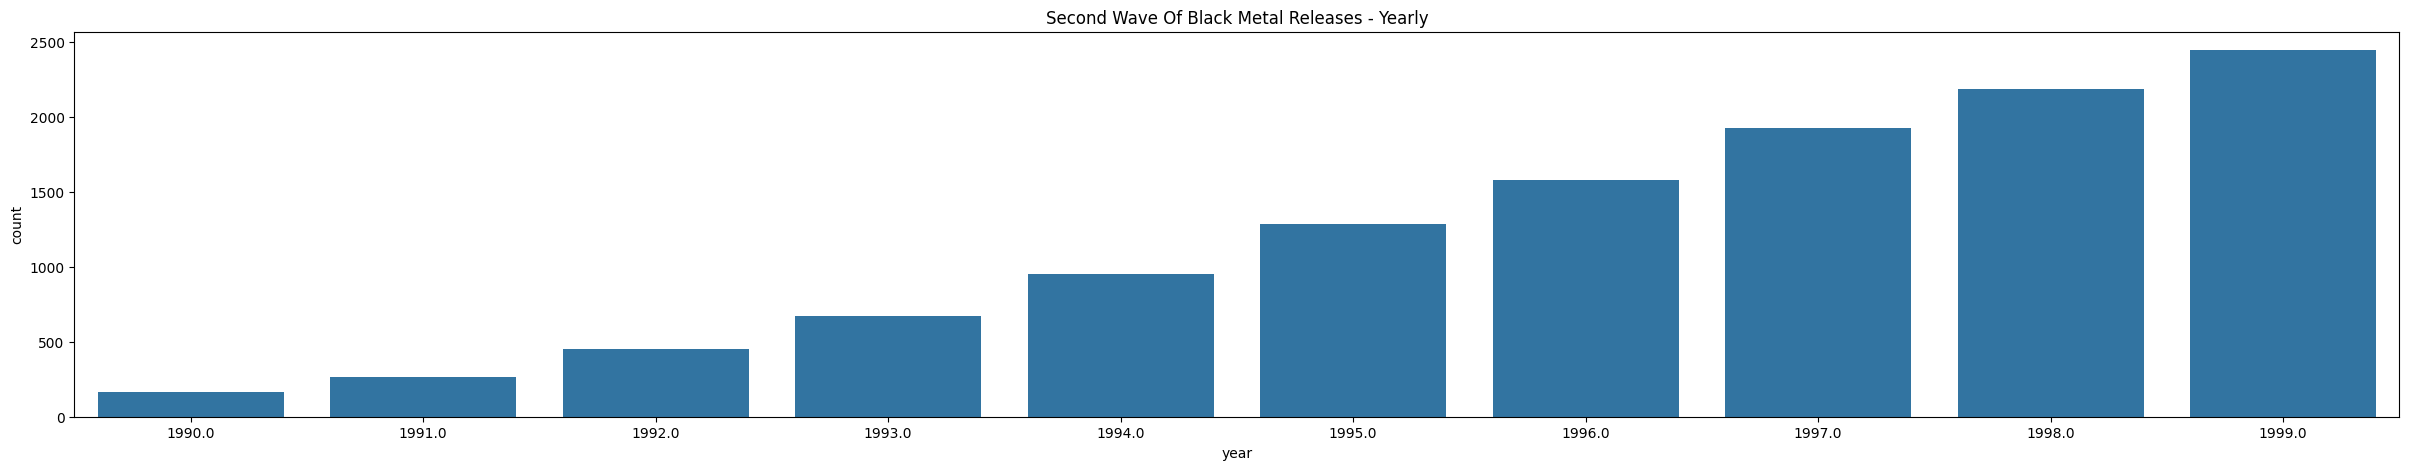

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(data=df6_second_wave.dropna(subset=['year']),x='year')
plt.title('Second Wave Of Black Metal Releases - Yearly')
plt.show()

### Country Chart

#### Preparing the data for geomap

Using the 'get_country_name' function created before

In [ ]:

countries_df6 = df6_second_wave['country'].value_counts().dropna().reset_index()
countries_df6.columns=['country','value']


countries_df6['country_standard'] = countries_df6['country'].apply(get_country_name)

countries_df6.loc[countries_df6['country_standard'] == 'United States', 'country_standard'] = 'United States of America'
countries_df6.loc[countries_df6['country_standard'] == 'UK', 'country_standard'] = 'United Kingdom'

countries_df6.head(10)


,country,value,country_standard
0,Germany,1767,Germany
1,US,1144,United States of America
2,Poland,1016,Poland
3,France,870,France
4,Italy,560,Italy
5,Sweden,548,Sweden
6,Norway,455,Norway
7,Russia,452,Russia
8,Greece,396,Greece
9,UK,387,United Kingdom


#### Plotting the country chart

<ipython-input-33-6417519a53ed>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_second_wave = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


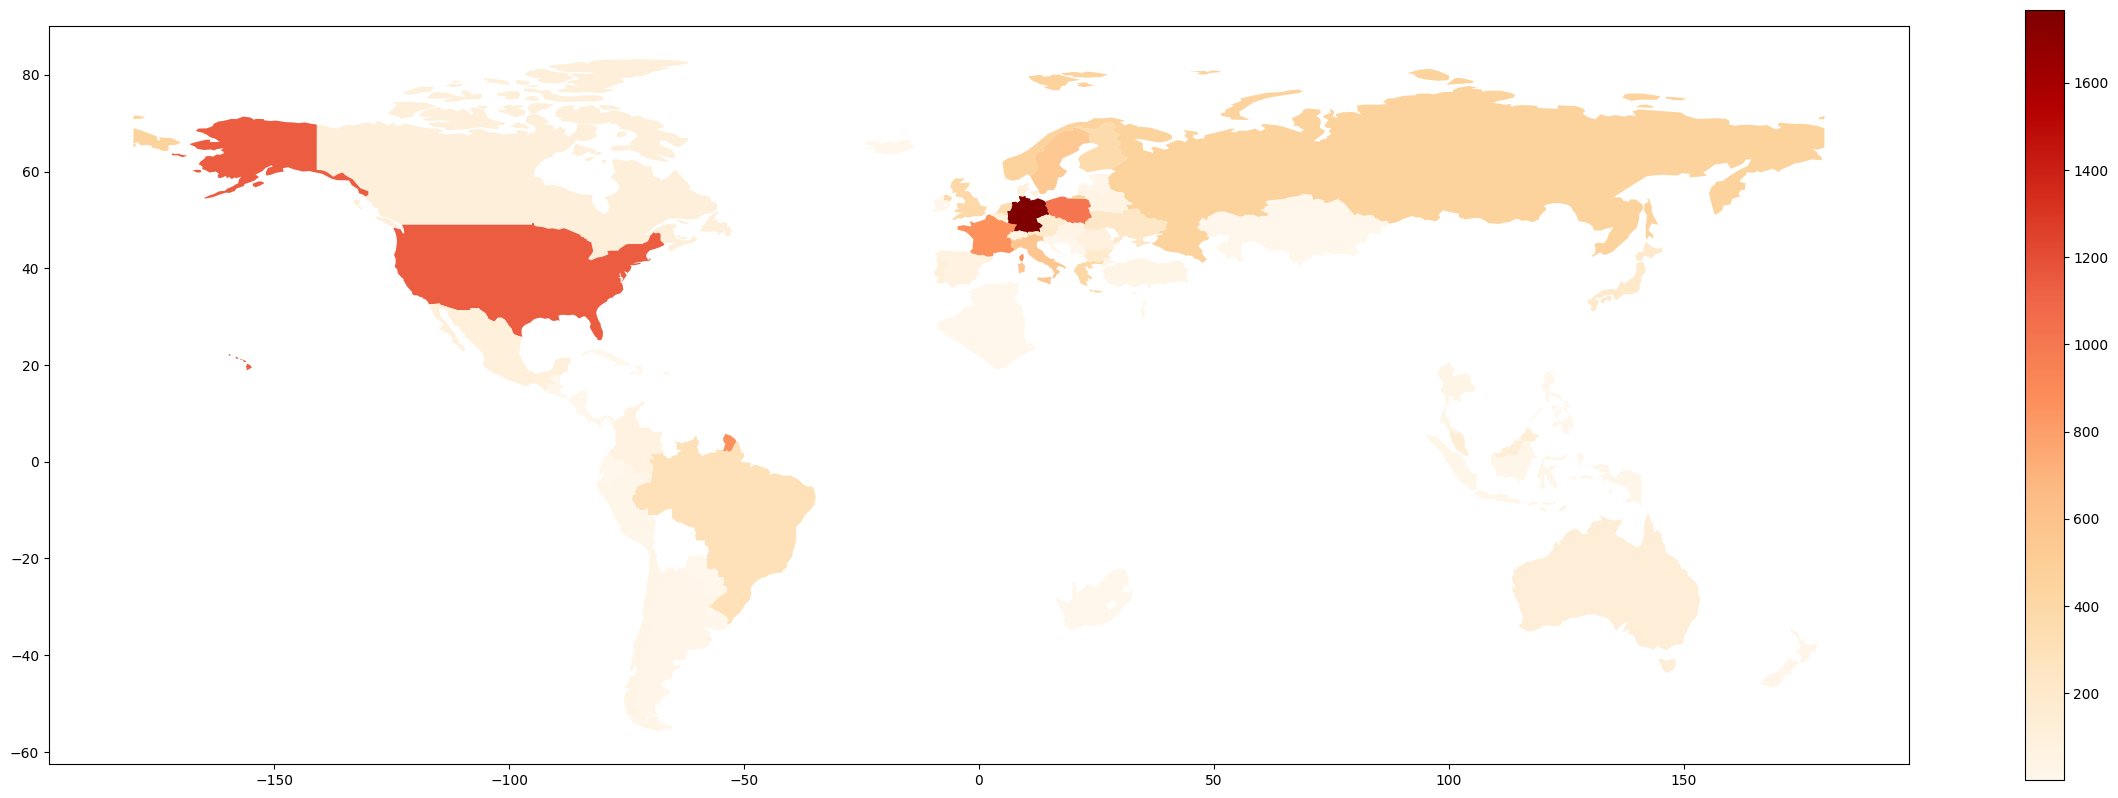

In [ ]:
world_second_wave = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_second_wave = world_second_wave.merge(countries_df6, left_on='name', right_on='country_standard')
world_second_wave.plot(column='value', legend=True, cmap='OrRd',figsize=(30, 10))
plt.show()

## Comparing Geographical situation of the 2 principal blackmetal waves

### Map Charts

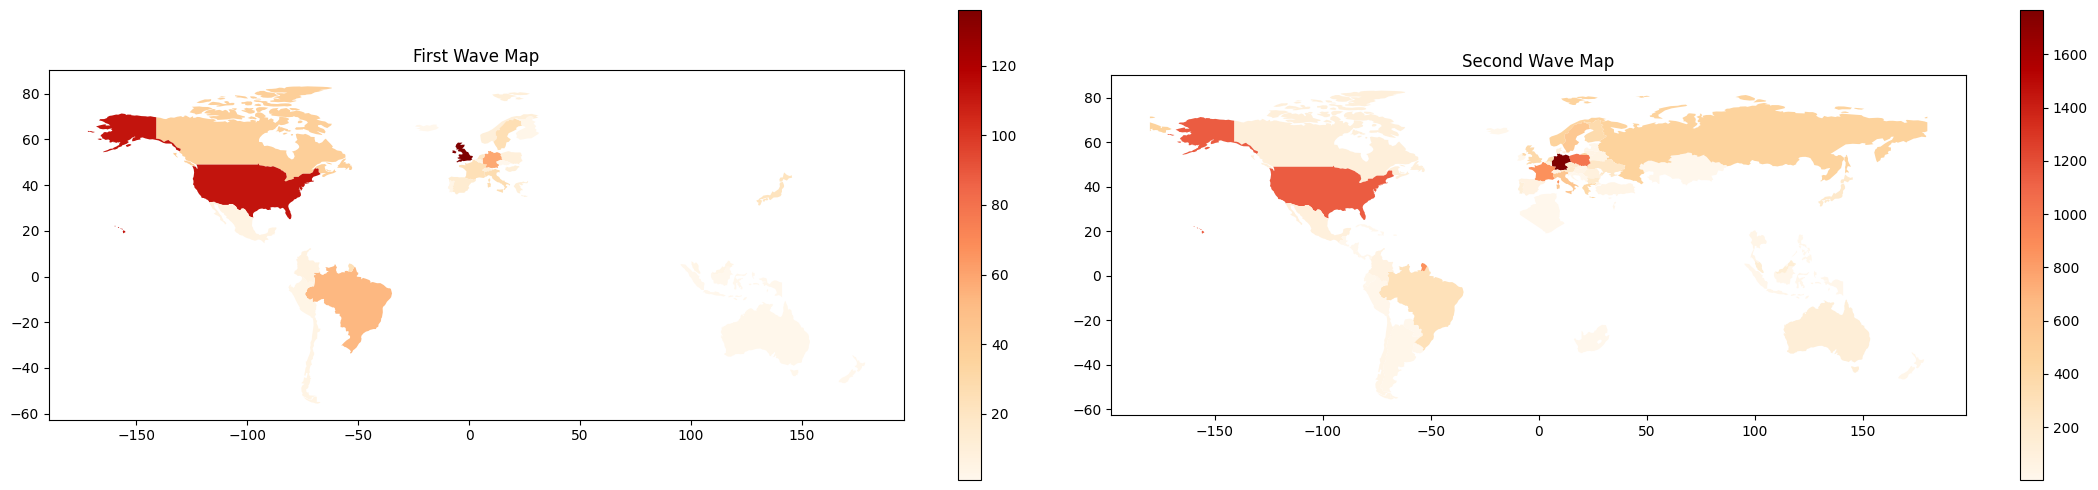

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))

world_first_wave.plot(column='value', legend=True, cmap='OrRd',ax=axes[0])
#world_first_wave.plot()
axes[0].set_title('First Wave Map')

world_second_wave.plot(column='value', legend=True, cmap='OrRd',ax=axes[1])
axes[1].set_title('Second Wave Map')
plt.tight_layout()
plt.show()



### Doughnut Charts

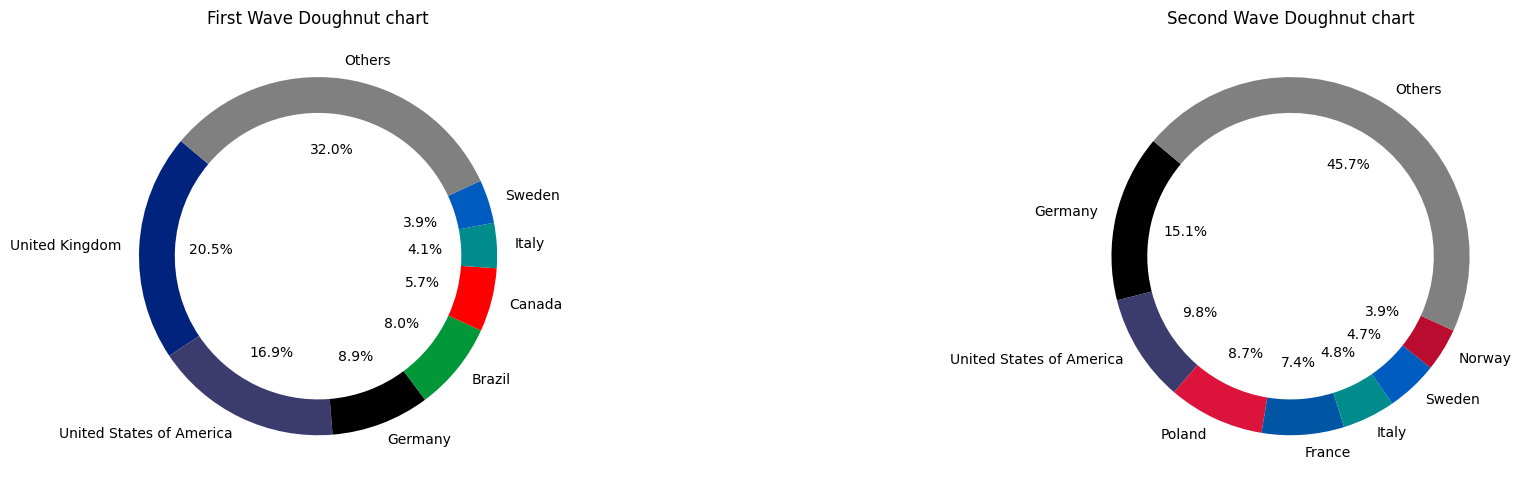

In [ ]:

# Dictionary of colors based on the countries' flags
colors_countries = {
    'United Kingdom': '#00247d',  # Dark blue (main color of the flag)
    'United States of America': '#3c3b6e',  # Dark blue (color of the US flag)
    'Germany': '#000000',  # Black (main color of the flag)
    'Brazil': '#009739',  # Green (main color of the flag)
    'Canada': '#ff0000',  # Red (main color of the flag)
    'Italy': '#008c8c',  # Green (color of the Italian flag)
    'Sweden': '#005cbf',  # Blue (main color of the Swedish flag)
    'Poland': '#dc143c',  # Red (main color of the Polish flag)
    'France': '#0055a4',  # Blue (main color of the French flag)
    'Norway': '#ba0c2f',  # Red (main color of the Norwegian flag)
    'Others': '#808080'  # Gray
}

fig, axes = plt.subplots(1, 2, figsize=(22, 5))


top7_countries_df5 = countries_df5.nlargest(7,columns='value')
others = pd.DataFrame({'country' : ["Others"],'value':[countries_df5['value'][7:].sum()], 'country_standard' : ["Others"]})
top7_countries_df5 = pd.concat([top7_countries_df5,others], ignore_index=True)


axes[0].pie(top7_countries_df5['value'], labels=top7_countries_df5['country_standard'],autopct='%1.1f%%', startangle=140,wedgeprops={'width': 0.2},colors=[colors_countries[label] for label in top7_countries_df5['country_standard']])
axes[0].set_title(f'First Wave Doughnut chart')


top7_countries_df6 = countries_df6.nlargest(7,columns='value')
others = pd.DataFrame({'country' : ["Others"],'value':[countries_df6['value'][7:].sum()], 'country_standard' : ["Others"]})
top7_countries_df6 = pd.concat([top7_countries_df6,others], ignore_index=True)

axes[1].pie(top7_countries_df6['value'], labels=top7_countries_df6['country_standard'],autopct='%1.1f%%', startangle=140,wedgeprops={'width': 0.2},colors=[colors_countries[label] for label in top7_countries_df6['country_standard']])
axes[1].set_title(f'Second Wave Doughnut chart')

plt.tight_layout()
plt.show()